In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
np.random.seed(0)
data_size = 1000

temperature = np.random.uniform(low=-10.0, high=50.0, size=data_size)
pressure = np.random.uniform(low=50000.0, high=120000.0, size=data_size)

df = pd.DataFrame({
    'temperature': temperature,
    'pressure': pressure
})

df.head()

,temperature,pressure
0,22.928810,91501.618955
1,32.911362,50704.458696
2,26.165803,83307.833710
3,22.692991,99613.927366
4,15.419288,53078.280242


In [3]:
df['class'] = np.where((df['temperature'] < 29) & (df['pressure'].between(50000, 102000)), 1, 0)

In [4]:
df.head(20)

,temperature,pressure,class
0,22.928810,91501.618955,1
1,32.911362,50704.458696,0
2,26.165803,83307.833710,1
3,22.692991,99613.927366,1
4,15.419288,53078.280242,1
5,28.753647,111566.503812,0
6,16.255233,86405.699164,1
7,43.506380,52146.273383,0
8,47.819766,65708.952834,0
9,13.006491,116757.298750,0


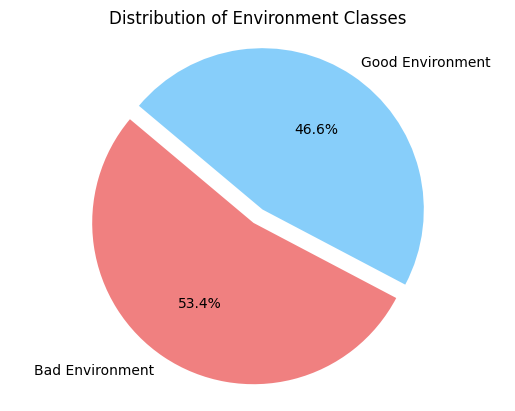

In [5]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()
labels = ['Bad Environment', 'Good Environment']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Environment Classes')
plt.axis('equal')  
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df[['temperature', 'pressure']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Lambda

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train_balanced)
#X_train_balanced = scaler.fit_transform(X_train_balanced)
#X_test = scaler.transform(X_test)

# Capture the scaling parameters
mean = scaler.mean_
scale = scaler.scale_

def scale_input(x):
    return (x - mean) / scale

In [8]:
model = keras.Sequential([
    Lambda(scale_input, input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # binarna klasifikacija
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20


22/22 [==============================] - 1s 9ms/step - loss: 0.6268 - accuracy: 0.7218 - val_loss: 0.5550 - val_accuracy: 0.8363
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.8843 - val_loss: 0.4466 - val_accuracy: 0.8538
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.9019 - val_loss: 0.3559 - val_accuracy: 0.8538
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.9034 - val_loss: 0.3024 - val_accuracy: 0.8596
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9151 - val_loss: 0.2617 - val_accuracy: 0.8655
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.9253 - val_loss: 0.2369 - val_accuracy: 0.8830
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9209 - val_loss: 0.2041 - val_accuracy: 0.9123
Epoch 8/20
22/22 [

In [10]:
predictions = model.predict(X_test)

print(predictions)

7/7 [==============================] - 0s 945us/step
[[7.61733809e-03]
 [4.99155521e-02]
 [9.94194448e-01]
 [9.95584548e-01]
 [8.71299684e-01]
 [9.99999583e-01]
 [1.97053887e-03]
 [1.39577284e-01]
 [9.99974787e-01]
 [5.51888300e-03]
 [6.19551241e-01]
 [9.99966502e-01]
 [9.75254774e-01]
 [9.98891950e-01]
 [9.56503987e-01]
 [5.56045771e-01]
 [9.99563098e-01]
 [3.02778743e-03]
 [1.21601261e-02]
 [2.43339664e-03]
 [1.54956728e-02]
 [1.61781104e-03]
 [1.41264454e-01]
 [4.51518077e-04]
 [1.36888084e-05]
 [9.99006033e-01]
 [3.43176071e-03]
 [5.68808231e-04]
 [9.99522865e-01]
 [9.99993622e-01]
 [9.98032868e-01]
 [9.63990316e-02]
 [2.73417719e-02]
 [9.98725712e-01]
 [7.21857399e-02]
 [9.99999821e-01]
 [1.01814359e-01]
 [9.97738447e-03]
 [3.14992666e-01]
 [9.98245597e-01]
 [9.99996245e-01]
 [9.65441167e-01]
 [9.99973893e-01]
 [9.96529707e-06]
 [3.11787080e-05]
 [2.04142462e-03]
 [7.27572618e-03]
 [9.99715626e-01]
 [7.05127060e-01]
 [9.99961793e-01]
 [5.06952812e-04]
 [1.96907725e-02]
 [2.8769785

In [11]:
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Test MAE: {test_mae}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9950
Test MAE: 0.9950000047683716


In [12]:
model.save('env_model.h5')

C:\Users\MadTweety\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('env_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MADTWE~1\AppData\Local\Temp\tmpbybkre1l\assets


INFO:tensorflow:Assets written to: C:\Users\MADTWE~1\AppData\Local\Temp\tmpbybkre1l\assets


In [19]:
prediction = model.predict((np.array([[29.51, 98750]], dtype=np.float32)))
print(prediction)

1/1 [==============================] - 0s 15ms/step
[[0.22076847]]
